In [148]:
import matplotlib.pyplot as plt
import mnist
import numpy as np

In [149]:
data = mnist.load_mnist(flatten = True, one_hot_label=True)

In [150]:
training_idx = 0
test_idx = 1
image_idx = 0
label_idx = 1

In [151]:
data[training_idx][image_idx][0].shape

(784,)

perceptron calculation procedure

1. input data
2. calculate dot with input data and weight

In [152]:
inputDatum = data[training_idx][image_idx][0]

In [153]:
inputDatum[0].shape

()

In [154]:
inputDatum

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [155]:
weight1 = np.random.rand(len(inputDatum), 16)

In [156]:
weight1

array([[0.63156215, 0.30022255, 0.45493116, ..., 0.78906228, 0.3829518 ,
        0.30592211],
       [0.82029868, 0.51963114, 0.45448848, ..., 0.72083904, 0.72259477,
        0.55223022],
       [0.47248277, 0.57639921, 0.34544577, ..., 0.19106815, 0.72701352,
        0.61934316],
       ...,
       [0.48924313, 0.30504431, 0.85980197, ..., 0.98917384, 0.62499001,
        0.48298065],
       [0.06387449, 0.33846916, 0.94248338, ..., 0.96354905, 0.27888754,
        0.73194292],
       [0.21130536, 0.06639181, 0.09467127, ..., 0.75315197, 0.31430942,
        0.5871451 ]], shape=(784, 16))

In [157]:
# visualize weight

In [158]:
weight1.shape

(784, 16)

In [159]:
weight1img = weight1.T[0].reshape(28, 28)

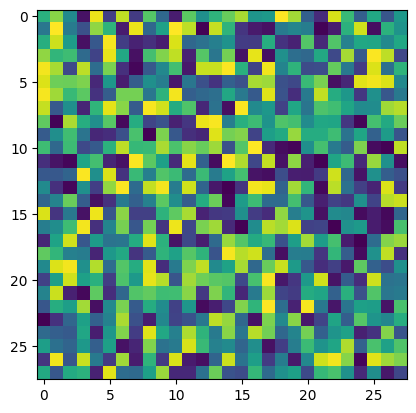

In [160]:
plt.imshow(weight1img)

In [161]:
# make visualize process in function
# before input to weight, weight should be translate
def visualizeWeight(weight):
    weightImg = weight.reshape(28, 28)
    return weightImg

In [162]:
xw = np.dot(inputDatum, weight1)

In [163]:
xw.shape

(16,)

In [164]:
xw

array([54.07341581, 59.39959922, 49.30896814, 53.88497047, 57.07169936,
       56.12718338, 47.34064258, 57.81076417, 55.23793495, 62.54590044,
       51.91822178, 53.86923015, 55.5046196 , 51.19439839, 54.70002536,
       54.84614642])

In [165]:
bias = np.random.rand(16, )

In [166]:
layer1 = xw + bias

In [167]:
layer1 # input * weight + bias

array([54.11690143, 59.93610401, 49.89452928, 54.38649759, 57.24722741,
       56.66968848, 48.09079659, 58.32554264, 55.46209197, 63.13718723,
       52.13121578, 54.5893446 , 56.10402368, 51.20217465, 55.59645997,
       55.76746715])

In [168]:
layer1.shape

(16,)

In [169]:
# layer2

In [170]:
weight2 = np.random.rand(len(layer1), 16)

In [171]:
weight2.shape

(16, 16)

In [172]:
l1w2 = np.dot(layer1, weight2)

In [173]:
l1w2.shape

(16,)

In [174]:
bias = np.random.rand(16, )

In [175]:
layer2 = l1w2 + bias

In [176]:
layer2.shape

(16,)

In [177]:
layer2

array([380.69162849, 495.19188171, 374.09338043, 462.53349308,
       471.65543498, 332.22151262, 375.22647318, 478.33109825,
       444.22988516, 391.34720374, 434.60039473, 463.80393652,
       419.1479338 , 523.47261753, 302.26855867, 374.93858305])

In [178]:
def relu(x):
    return np.maximum(0, x)

In [179]:
# output layer

In [180]:
weight3 = np.random.rand(len(layer2), 10)

In [181]:
weight3.shape

(16, 10)

In [182]:
l2w3 = np.dot(layer2, weight3)

In [183]:
l2w3.shape

(10,)

In [184]:
bias = np.random.rand(10, )

In [185]:
layer3 = l2w3 + bias

In [186]:
layer3.shape

(10,)

In [187]:
(layer3 > 0)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [188]:
output = relu(layer3)

In [189]:
result = output // np.max(output)

In [190]:
np.where(result == 1)

(array([9]),)

In [191]:
# compare result with training data

In [192]:
inputDatum.shape

(784,)

In [193]:
np.where(data[training_idx][label_idx][0] == 1)

(array([5]),)

In [194]:
# result is 6
# label is 5
# not correct

In [195]:
# 中間層は2層ある
# それぞれの層は16個のニューロンを持つ
# 単純に積算をするだけ。

def nnv1(inputData):
    weight1 = np.random.rand(len(inputData), 16)
    inputWeight1 = np.dot(inputData, weight1)
    bias1 = np.random.rand(16, )
    layer1 = inputWeight1 + bias1

    weight2 = np.random.rand(len(layer1), 16)
    layer1weight2 = np.dot(layer1, weight2)
    bias2 = np.random.rand(16, )
    layer2 = layer1weight2 + bias2

    weight3 = np.random.rand(len(layer2), 10)
    layer2weight3 = np.dot(layer2, weight3)
    bias3 = np.random.rand(10, )
    layer3 = layer2weight3 + bias3

    output = relu(layer3)

    result = output // np.max(output)
    return result

In [196]:
inputData = data[training_idx][image_idx]
labelData = data[training_idx][label_idx]

In [197]:
print(inputData.shape)
print(labelData.shape)

(60000, 784)
(60000, 10)


In [198]:
nnv1(inputData[0])

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [199]:
labelData[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [200]:
output

array([3487.73772111, 2646.40132847, 3315.6661098 , 3195.60304328,
       3132.56246652, 3361.10461524, 2617.55364898, 3969.49723452,
       3251.62385283, 4474.90276057])

In [201]:
costLayerDifferentialByOutput = 2 * (output - labelData[0])

In [140]:
costLayerDifferentialByOutput 

array([8366.53083213, 8216.64671789, 7028.77129954, 8628.03338241,
       6895.31915643, 6283.31050127, 8943.47145484, 7497.88597639,
       6801.69270147, 6125.54379422])

In [202]:
outputLayerDifferentialByLayer3 = costLayerDifferentialByOutput * (layer3 > 0).astype(int)

In [208]:
outputLayerDifferentialByLayer3.shape

(10,)

In [210]:
layer3DifferentialByWeight3

In [211]:
weight3.shape

(16, 10)